THIRD AND FINAL STEP:

now we want to turn each poster into an array holding (100,100,3) with RGB values


    We made a loop taking every poster and turning it into a 100,3,3 array using np


now our data is ready for CNN

In [168]:
from PIL import Image
import pandas as pd
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow import keras

In [169]:
data = pd.read_csv("BingeWatch.csv",encoding='latin1')
data

,Unnamed: 0,imdbID,Genre
0,0,tt2912776,Music
1,1,tt2912776,Drama
2,2,tt3240784,Documentary
3,3,tt2265431,Romance
4,4,tt2265431,Drama
...,...,...,...
9285,9285,tt0081398,Biography
9286,9286,tt0080678,Biography
9287,9287,tt0080948,Music
9288,9288,tt0080549,Music


In [171]:
counter = 0
deleteLater = []
for i in range(len(data)):
    if not isinstance(data['Genre'][i], str):
        counter+=1
        deleteLater.append(data['imdbID'][i])
        print(data['Genre'][i]) 
#SHOULDN'T PRINT ANYTHING

In [174]:
genreCode = preprocessing.LabelEncoder()
genreCode.fit(data['Genre'])
data['GenreCategory']= genreCode.transform(data['Genre'])
data

,Unnamed: 0,imdbID,Genre,GenreCategory
0,0,tt2912776,Music,10
1,1,tt2912776,Drama,6
2,2,tt3240784,Documentary,5
3,3,tt2265431,Romance,12
4,4,tt2265431,Drama,6
...,...,...,...,...
9285,9285,tt0081398,Biography,2
9286,9286,tt0080678,Biography,2
9287,9287,tt0080948,Music,10
9288,9288,tt0080549,Music,10


In [175]:
genre = []
poster = []
category = []

In [176]:
for i in range(len(data)):
    tempImage = Image.open(f"Posters100x100/{data['imdbID'][i]}.jpg")
    poster.append(np.array(tempImage))
    genre.append(data['Genre'][i])
    category.append(data['GenreCategory'][i])

In [177]:
print(len(genre))
print(len(category))
print(len(poster))
print(len(poster[0]))
print(len(poster[0][0]))
print(len(poster[0][0][0]))

9290
9290
9290
100
100
3


In [178]:
poster

[array([[[28, 28, 28],
         [28, 28, 28],
         [28, 28, 28],
         ...,
         [27, 25, 26],
         [30, 28, 29],
         [32, 30, 31]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 6,  4,  5],
         [10,  8,  9],
         [13, 11, 12]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [17, 16, 14],
         [24, 23, 21],
         [28, 27, 25]],
 
        ...,
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]], dtype=uint8),
 array([[[28, 28, 28],
         [28, 28, 2

In [179]:
for i in range(len(poster) -1, -1 ,-1):
    if poster[i].shape != (100,100,3): #some posters didnt have 100,100,3 so we deleted them
        genre.pop(i)
        category.pop(i)
        poster.pop(i)

        
print(len(genre))

9290


In [180]:
for i in range (len(genre) -1, 0 ,-1): #had a nan value
    if not isinstance(genre[i], str):
        genre.pop(i)
        category.pop(i)
        poster.pop(i)

In [181]:
GenreStrings = []
GenreStringsNo = []
for i in range(len(genre)):
  if genre[i] not in GenreStrings:
    GenreStrings.append(genre[i])
    GenreStringsNo.append(category[i])
print(len(GenreStrings))
print(len(GenreStringsNo))

15
15


In [182]:
GenreStringsNo

[10, 6, 5, 12, 3, 14, 8, 4, 9, 0, 11, 7, 1, 13, 2]

In [142]:
GenreStrings

['Music',
 'Drama',
 'Documentary',
 'Romance',
 'Comedy',
 'Thriller',
 'Fantasy',
 'Crime',
 'Horror',
 'Action',
 'Mystery',
 'Family',
 'Adventure',
 'Sci-Fi',
 'Biography']

In [184]:
print(len(genre))
print(len(category))
print(len(poster))

9290
9290
9290


In [193]:
X_train, X_test, y_train, y_test = train_test_split(poster, category, test_size=0.3)

In [194]:
y_train

[4,
 7,
 3,
 14,
 11,
 8,
 1,
 7,
 9,
 14,
 10,
 13,
 12,
 0,
 0,
 3,
 9,
 9,
 9,
 13,
 6,
 4,
 10,
 0,
 0,
 11,
 0,
 10,
 10,
 6,
 12,
 5,
 10,
 11,
 2,
 11,
 7,
 2,
 13,
 14,
 8,
 6,
 11,
 8,
 8,
 14,
 6,
 7,
 0,
 8,
 5,
 2,
 11,
 14,
 2,
 10,
 6,
 2,
 3,
 4,
 10,
 2,
 6,
 6,
 11,
 9,
 13,
 14,
 7,
 5,
 1,
 2,
 13,
 13,
 2,
 12,
 11,
 14,
 14,
 10,
 14,
 3,
 9,
 1,
 0,
 5,
 8,
 11,
 9,
 5,
 0,
 0,
 11,
 7,
 3,
 7,
 2,
 10,
 2,
 1,
 4,
 11,
 9,
 13,
 9,
 2,
 2,
 5,
 6,
 0,
 13,
 7,
 7,
 3,
 2,
 11,
 6,
 9,
 11,
 14,
 5,
 6,
 2,
 13,
 12,
 8,
 12,
 8,
 2,
 12,
 9,
 12,
 0,
 13,
 8,
 4,
 5,
 0,
 0,
 0,
 2,
 14,
 13,
 6,
 9,
 1,
 2,
 3,
 6,
 12,
 11,
 3,
 0,
 11,
 12,
 12,
 4,
 9,
 9,
 13,
 3,
 6,
 7,
 5,
 7,
 11,
 4,
 0,
 14,
 13,
 9,
 7,
 0,
 1,
 1,
 6,
 13,
 12,
 6,
 1,
 0,
 13,
 1,
 2,
 9,
 9,
 0,
 2,
 13,
 13,
 12,
 6,
 5,
 0,
 0,
 12,
 6,
 11,
 7,
 13,
 13,
 9,
 11,
 10,
 14,
 7,
 8,
 10,
 9,
 1,
 14,
 1,
 14,
 3,
 14,
 12,
 5,
 6,
 4,
 8,
 7,
 13,
 8,
 1,
 10,
 7,
 11,
 7,
 5,
 6,

In [195]:
y_test

[5,
 3,
 3,
 6,
 6,
 11,
 0,
 7,
 8,
 2,
 6,
 4,
 8,
 6,
 14,
 4,
 1,
 10,
 1,
 11,
 0,
 0,
 8,
 8,
 8,
 13,
 8,
 8,
 12,
 2,
 4,
 11,
 5,
 1,
 8,
 13,
 4,
 2,
 7,
 7,
 12,
 9,
 14,
 0,
 13,
 12,
 5,
 2,
 4,
 9,
 8,
 9,
 0,
 6,
 3,
 2,
 12,
 13,
 10,
 10,
 7,
 10,
 3,
 0,
 13,
 2,
 0,
 14,
 9,
 5,
 5,
 14,
 11,
 1,
 4,
 6,
 9,
 8,
 1,
 2,
 11,
 12,
 0,
 13,
 11,
 12,
 7,
 2,
 7,
 6,
 4,
 1,
 0,
 3,
 10,
 3,
 13,
 10,
 11,
 10,
 0,
 4,
 0,
 6,
 12,
 11,
 4,
 6,
 7,
 2,
 11,
 7,
 5,
 5,
 8,
 2,
 10,
 10,
 4,
 9,
 5,
 14,
 10,
 0,
 6,
 9,
 11,
 3,
 8,
 5,
 11,
 13,
 13,
 10,
 3,
 5,
 2,
 3,
 14,
 7,
 2,
 2,
 5,
 0,
 0,
 3,
 14,
 10,
 10,
 7,
 4,
 12,
 1,
 9,
 10,
 7,
 9,
 8,
 10,
 9,
 9,
 11,
 2,
 1,
 7,
 11,
 2,
 11,
 5,
 4,
 1,
 2,
 10,
 11,
 6,
 3,
 2,
 13,
 1,
 9,
 11,
 2,
 0,
 7,
 11,
 7,
 5,
 5,
 8,
 1,
 6,
 1,
 7,
 9,
 6,
 11,
 3,
 6,
 3,
 14,
 7,
 1,
 0,
 4,
 1,
 9,
 7,
 0,
 9,
 9,
 12,
 1,
 12,
 5,
 6,
 0,
 3,
 11,
 13,
 2,
 7,
 10,
 11,
 0,
 14,
 11,
 3,
 14,
 11,
 1,
 11,
 13,


In [196]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

6503
6503
2787
2787


In [197]:
X_train = np.array(X_train) #turn them into numpy arrays
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [198]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (6503, 100, 100, 3)
6503 train samples
2787 test samples


In [199]:
for i in range(len(y_train)): #to make sure that all genres are in training data
    if y_train[i] not in GenreStringsNo :
        print(y_train[i])
#SHOULDN'T PRINT ANYTHING

In [200]:
y_train = to_categorical(y_train, len(GenreStrings))
y_test = to_categorical(y_test, len(GenreStrings))
print (y_train.shape)
print(y_test.shape)
print (y_train)
print (y_train[0])

(6503, 15)
(2787, 15)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


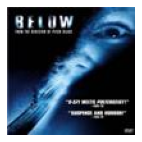

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Horror


In [208]:
index = 498
plt.figure(figsize=(20, 4))
# original
plt.subplot(2, 10, 1)
# plt.figure(figsize = (15,2))
plt.imshow(X_train[index].reshape(100, 100,3))
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.show()
print(y_train[index])
for i in range(len(GenreStringsNo)):
    if (np.argmax(y_train[index])) == GenreStringsNo[i]:
        print(GenreStrings[i])

In [209]:
print(GenreStringsNo)
print(GenreStrings)

[10, 6, 5, 12, 3, 14, 8, 4, 9, 0, 11, 7, 1, 13, 2]
['Music', 'Drama', 'Documentary', 'Romance', 'Comedy', 'Thriller', 'Fantasy', 'Crime', 'Horror', 'Action', 'Mystery', 'Family', 'Adventure', 'Sci-Fi', 'Biography']


In [210]:
model = Sequential()
model.add(Conv2D(20, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(10, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(len(GenreStrings), activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 20)      560       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 20)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 10)        1810      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6250)              0         
                                                                 
 dropout_2 (Dropout)         (None, 6250)             

In [211]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [215]:
model.fit(X_train, y_train, epochs =15, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/15
41/41 [==============================] - 19s 475ms/step - loss: 1.0828 - accuracy: 0.6175 - val_loss: 3.5237 - val_accuracy: 0.1937
Epoch 2/15
41/41 [==============================] - 22s 538ms/step - loss: 1.0381 - accuracy: 0.6323 - val_loss: 3.6172 - val_accuracy: 0.1868
Epoch 3/15
41/41 [==============================] - 21s 509ms/step - loss: 0.9995 - accuracy: 0.6457 - val_loss: 3.6141 - val_accuracy: 0.1914
Epoch 4/15
41/41 [==============================] - 21s 513ms/step - loss: 0.9643 - accuracy: 0.6546 - val_loss: 3.7199 - val_accuracy: 0.1875
Epoch 5/15
41/41 [==============================] - 22s 527ms/step - loss: 0.9560 - accuracy: 0.6680 - val_loss: 3.8084 - val_accuracy: 0.1922
Epoch 6/15
41/41 [==============================] - 23s 553ms/step - loss: 0.9139 - accuracy: 0.6672 - val_loss: 3.7961 - val_accuracy: 0.1899
Epoch 7/15
41/41 [==============================] - 22s 543ms/step - loss: 0.8967 - accuracy: 0.6763 - val_loss: 3.9498 - val_accuracy: 0.1906

(2787, 15)


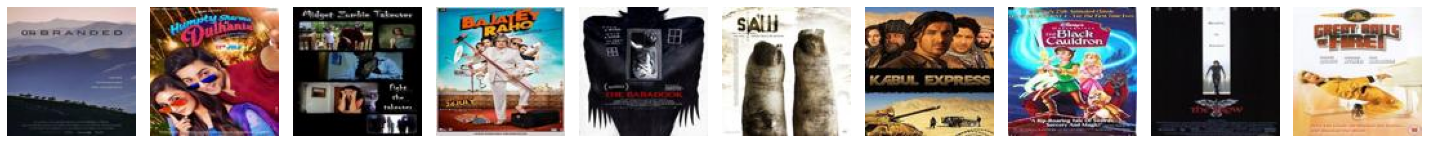

[0.02131915 0.03868185 0.03276666 0.04347214 0.05608999 0.2683457
 0.22915271 0.04257706 0.01138695 0.02162688 0.01557392 0.08325046
 0.03248682 0.07278071 0.03048897]
5
 Genre is Fantasy
predicted is Documentary
 Genre is Romance
predicted is Romance
 Genre is Mystery
predicted is Crime
 Genre is Family
predicted is Family
 Genre is Adventure
predicted is Drama
 Genre is Action
predicted is Sci-Fi
 Genre is Family
predicted is Adventure
 Genre is Family
predicted is Family
 Genre is Horror
predicted is Fantasy
 Genre is Music
predicted is Music


In [217]:
# Compare original images with Predicted ones
decoded_imgs1 = model.predict(X_test)
print(decoded_imgs1.shape)
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    # plt.figure(figsize = (15,2))
    plt.imshow(X_test[i].reshape(100, 100,3))
    plt.gray()
    plt.axis('off')
plt.tight_layout()
plt.show()
print(decoded_imgs1[0])
print(np.argmax(decoded_imgs1[0]))
for i in range(10):
  index = np.argmax(decoded_imgs1[i]) #index of max value
  for j in range(len(GenreStringsNo)):
      if (np.argmax(y_train[index])) == GenreStringsNo[j]:
        print(f" Genre is {GenreStrings[j]}") 
  for j in range(len(GenreStringsNo)):
      if (np.argmax(decoded_imgs1[i])) == GenreStringsNo[j]:
        print(f"predicted is {GenreStrings[j]}")
  # print(f"Genre in Movie is {GenreStrings[np.argmax(y_test[i])]},  predicted is {GenreStrings[index]}")

In [ ]:
#Evaluate the trained model
#Should have test and train genres equal
score = model.evaluate(X_test, y_test)
print("Test Loss: {:.2f}%".format(score[0]*100))
print("Test Accuracy:  {:.2f}%".format(score[1]*100))

Y_train (24)  <== 24 Genre Y_train
Y_Test (22) <== 22 Genre


In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
model.save_weights(checkpoint_path)